In [826]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [827]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list

# def neighbors_in_radius(G, radius):
#     adj = np.array(nx.linalg.graphmatrix.adjacency_matrix(G).todense()).astype(float)  # much faster as float
#     power_adj = connected = adj
#     for i in range(radius - 1):
#         power_adj = power_adj.dot(adj)
#         connected = connected + power_adj
#     connected = connected.astype(bool).astype(int)
#     return connected

# function to check whether the list is empty or not
def is_list_empty(list):
    # checking the length
    if len(list) == 0:
        # returning true as length is 0
        return True
    # returning false as length is greater than 0
    return False

In [828]:
#Create dummy data
# 8:{"location":(0,0),"tag":"WO6","building":"BK","size":2,"type":"W2"}
# 1:{"location":(0,0),"tag":"V1","building":"BK","size":3,"structure":3,"solar":1}

vacant_spaces = {
"V1":{"location":(0,1),"tag":"V1","building":"BK","size":3,"structure":3,"solar":1, "node_type":"vacant"}, 
"V2":{"location":(10,2),"tag":"V2","building":"BK","size":3,"structure":3,"solar":1, "node_type":"vacant"},
"V3":{"location":(2,7),"tag":"V3","building":"BK","size":2,"structure":3,"solar":3, "node_type":"vacant"},
"V4":{"location":(4,8),"tag":"V4","building":"BK","size":3,"structure":1,"solar":3, "node_type":"vacant"},
"V5":{"location":(2,3),"tag":"V5","building":"BK","size":1,"structure":1,"solar":3, "node_type":"vacant"},
"V6":{"location":(4,4),"tag":"V6","building":"BK","size":2,"structure":2,"solar":1, "node_type":"vacant"}}

wastes = {
"WO1":{"location":(0,0),"tag":"WO1","building":"BK","size":3,"type":"W1", "node_type":"waste"}, 
"WO2":{"location":(8,1),"tag":"WO2","building":"BK","size":3,"type":"W6", "node_type":"waste"},
"WO3":{"location":(1,7),"tag":"WO3","building":"BK","size":2,"type":"W4", "node_type":"waste"},
"WO4":{"location":(2,6),"tag":"WO4","building":"BK","size":3,"type":"W2", "node_type":"waste"},
"WO5":{"location":(4,5),"tag":"WO5","building":"BK","size":1,"type":"W5", "node_type":"waste"},
"WO6":{"location":(3,2),"tag":"WO6","building":"BK","size":1,"type":"W5", "node_type":"waste"},
"WO7":{"location":(2,4),"tag":"WO7","building":"BK","size":1,"type":"W5", "node_type":"waste"},
"WO8":{"location":(10,3),"tag":"WO8","building":"BK","size":1,"type":"W3", "node_type":"waste"},
"WO9":{"location":(10,1),"tag":"WO9","building":"BK","size":2,"type":"W2", "node_type":"waste"}}

nearby_waste = (("V1","WO5"),("V1","WO6"),("V1","WO7"),("V1","WO3"),("V1","WO8"),("V2","WO5"),("V2","WO6"),("V2","WO7"),("V2","WO3"),("V2","WO8"),("V2","WO2"),("V4","WO8"),("V4","WO9"),("V1","WO2"),("V6","WO3"),("V6","WO8"),("V6","WO9"))

In [829]:
# Tried to find nearby nodes only using python but it is taking too much time, prototype will instead work with lists provided by grasshopper
#  waste_nearby=[]
# for i in vacant_spaces:
#     for k in wastes:
#         tuples=(i,k)
#         waste_nearby.append(tuples)
# waste_nearby=tuple(waste_nearby)
# print(waste_nearby)

In [830]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"S","weight":3,"solar":2,"in":["W7"],"supplement":["S3","S5","S6"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":["S1"],"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S1"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1"]}
}

critical_items=["W1", "W4"]
non_critical_items=["W2","W3","W5","W6","W7"]

In [831]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
print(v_potential)

{'V1': {'tag': 'V1', 'UF': ['UF3', 'UF8']}, 'V2': {'tag': 'V2', 'UF': ['UF3', 'UF8']}, 'V3': {'tag': 'V3', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF9']}, 'V5': {'tag': 'V5', 'UF': ['UF4', 'UF5', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF3']}}


{'V1': ['WO5', 'WO6', 'WO7', 'WO3', 'WO8', 'WO2'], 'V2': ['WO5', 'WO6', 'WO7', 'WO3', 'WO8', 'WO2'], 'V3': [], 'V4': ['WO8', 'WO9'], 'V5': [], 'V6': ['WO3', 'WO8', 'WO9']}


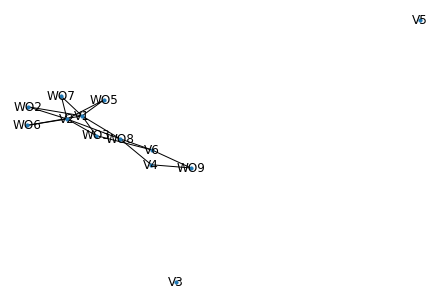

In [832]:
#Draw graph from "vacant_spaces" and "waste" nodes with the given nearby nodes
# nodes_dict={}
# for i in wastes:
#     nodes_dict[i]=wastes[i]["location"]
# for i in vacant_spaces:
#     nodes_dict[i]=vacant_spaces[i]["location"]

# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i,j in vacant_spaces.items():
    G.add_node(i)
G.add_edges_from(nearby_waste)
nx.draw(G, with_labels=True, node_size=10)
# nx.draw_networkx(G,nodes_dict)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    new_list = []
    if i in vacant_spaces:
        waste_dict[i]=k
print (waste_dict)

In [833]:
# For each vacant space find wastes within radius=1

# new_list=[]
# for nodes in G.nodes():
#     for i,j in vacant_spaces.items():
#         if nodes == vacant_spaces[i]["tag"]:
#             new_list.append(nodes)
# print(new_list)
# for i in new_list:
#     # print(i, "is i")
#     G_close = nx.ego_graph(G,i,radius=1)
#     nx.draw(G_close, with_labels=True, node_size=2)
#     edge_dictionary=create_edge_dict(G_close)

# G_close = nx.ego_graph(G,"V1",radius=1)
# nx.draw(G_close, with_labels=True, node_size=2)
# G_close.edges("V1")

# waste_nearby={}
# for m,n in vacant_spaces.items():
#     for i,k in edge_dictionary.items():
#         if i!=vacant_spaces[m]["tag"]:
#             print(i, "is not vacant space")
#         else:
#             waste_nearby[i]=k
#             # print(i, "is vacant space")
            
# ###### include waste types!!!!!!

# print(waste_nearby)

In [834]:
#List of dictionaries we will use:
print(v_potential)
print(waste_dict)
print(uf_systems)

{'V1': {'tag': 'V1', 'UF': ['UF3', 'UF8']}, 'V2': {'tag': 'V2', 'UF': ['UF3', 'UF8']}, 'V3': {'tag': 'V3', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF9']}, 'V5': {'tag': 'V5', 'UF': ['UF4', 'UF5', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF3']}}
{'V1': ['WO5', 'WO6', 'WO7', 'WO3', 'WO8', 'WO2'], 'V2': ['WO5', 'WO6', 'WO7', 'WO3', 'WO8', 'WO2'], 'V3': [], 'V4': ['WO8', 'WO9'], 'V5': [], 'V6': ['WO3', 'WO8', 'WO9']}
{'UF1': {'tag': 'UF1', 'type': 'S', 'weight': 3, 'solar': 1, 'in': ['W1', 'W2', 'W3', 'W6'], 'supplement': None, 'out': ['S4', 'S5']}, 'UF2': {'tag': 'UF2', 'type': 'S', 'weight': 3, 'solar': 2, 'in': ['W7'], 'supplement': ['S3', 'S5', 'S6'], 'out': ['O4', 'S2']}, 'UF3': {'tag': 'UF3', 'type': 'F', 'weight': 2, 'solar': 1, 'in': ['W2', 'W3', 'W4', 'W6'], 'supplement': ['S1'], 'out': ['O3', 'S4']}, 'UF4': {'tag': 'UF4', 'type': 'F', 'weight': 1, 'solar': 3, 'in': ['W5', 'W6', 'W7'], 'supplement': ['S2'], 'out': ['O1', 'W1']}, 'UF5': {'t

In [835]:
# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}

for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]
       
print(v_potential_dict)    

{'V1': {'UF3': ['W2', 'W3', 'W4', 'W6'], 'UF8': ['W5', 'W6']}, 'V2': {'UF3': ['W2', 'W3', 'W4', 'W6'], 'UF8': ['W5', 'W6']}, 'V3': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF6': ['W6'], 'UF7': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6']}, 'V4': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6']}, 'V5': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6']}, 'V6': {'UF3': ['W2', 'W3', 'W4', 'W6']}}


#Design Rule 1.0 : Waste Availability
    #if there are more than 2 found items assign that system to that vacant space

Design Rule 2: Introduction of Quantity
    if vacant space size = waste quantity

Design Rule 3.0 : Sharing Existing Resources
   ~ to be developed 
    

In [836]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    # print(i, "is space")
    for system,demanded in k.items():
        # print(system, demanded)
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found_dict[i][system]["source"]={}
        # found_dict[i][system]["missing"]={}
        # print("for",system,demanded,"is needed")
        found=[]
        source=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                available = wastes[waste]["type"]
                source2 = wastes[waste]["tag"]
                # print(source)
                source_size = wastes[waste]["size"]
                #print("for",system, "in",i, demanded, "is needed",available, "is available")
                if each == available:
                    # print ("found",each)
                    found.append(available)
                    source.append(source2)
                    found_dict[i][system]["found"]=found
                    found_dict[i][system]["source"]=source
                # else:
                #     
                #     missing.append(each)
                #     found_dict[i][system]["missing"]=missing

#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

##remove repeating items
# for i,k in found_dict.items():
#     for system in k:
#         found_items = found_dict[i][system]["found"]
#         duplicate=list_duplicates(found_items)
#         for found in found_items:
#             if found in duplicate:
#                 found_items.remove(found)

#reach sizes of duplicate items
for i,k in found_dict.items():
    for system in k:
        found_items=found_dict[i][system]["found"]
        
print (found_dict["V1"]["UF8"]["source"])
print (found_dict)

['WO5', 'WO6', 'WO7', 'WO2']
{'V1': {'UF3': {'found': ['W4', 'W3', 'W6'], 'source': ['WO3', 'WO8', 'WO2'], 'missing': ['W2']}, 'UF8': {'found': ['W5', 'W5', 'W5', 'W6'], 'source': ['WO5', 'WO6', 'WO7', 'WO2'], 'missing': []}}, 'V2': {'UF3': {'found': ['W4', 'W3', 'W6'], 'source': ['WO3', 'WO8', 'WO2'], 'missing': ['W2']}, 'UF8': {'found': ['W5', 'W5', 'W5', 'W6'], 'source': ['WO5', 'WO6', 'WO7', 'WO2'], 'missing': []}}, 'V3': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF6': {'found': {}, 'source': {}, 'missing': ['W6']}, 'UF7': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V4': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missi

In [837]:
# apply design rule 3.1
# if v_size == w_size+w_size+w_size add to found & remove from wastes list

# duplicate_items={}
# for space,potential in found_dict.items():
#     duplicate_items[space]={}
#     # print(potential)
#     for system, k in potential.items():
#         if len(found_dict[space][system]["found"])> 1:
#             found_items3=found_dict[space][system]["found"]
#             # print(found_dict[space][system]["source"])
#             # print(found_items3)
#             sources=[]
#             for index,items in enumerate(found_items3):
#                 # print(index,items)
#                 count=found_items3.count(items)
#                 # print(count)
#                 if count>1:
#                     items_str=str(items)
#                     sources.append(found_dict[space][system]["source"][index])
    
#             duplicate_items[space]["matching sources"]=sources

            
#                     # if sum(wastes[sources]["size"])== vacant_spaces[space]["size"]:
# print(sources)
# print(duplicate_items)


In [838]:
#Make a dictionary holding each vacant space& found and repeating waste type & waste sources corresponding to found items
duplicate_items={}
for space,potential in found_dict.items():
    
    duplicate_items[space]={}
    # print(potential)
    for system, k in potential.items():
        
        if len(found_dict[space][system]["found"])> 1:
            found_items3=found_dict[space][system]["found"]
            # print(found_dict[space][system]["source"])
            sources=[]
            for index,items in enumerate(found_items3):
                # print(index,items)
                duplicate_items[space][items]={}
                count=found_items3.count(items)
                # print(found_items3,space,item,count)
                
                if count>1:
                    items_str=str(items)
                    sources.append(found_dict[space][system]["source"][index])
                    duplicate_items[space][items]["matching sources"]=sources

print(duplicate_items)

{'V1': {'W4': {}, 'W3': {}, 'W6': {}, 'W5': {'matching sources': ['WO5', 'WO6', 'WO7']}}, 'V2': {'W4': {}, 'W3': {}, 'W6': {}, 'W5': {'matching sources': ['WO5', 'WO6', 'WO7']}}, 'V3': {}, 'V4': {}, 'V5': {}, 'V6': {'W4': {}, 'W3': {}, 'W2': {}}}


In [839]:
#check if the total size of found waste matches the vacant space size
print(duplicate_items)  
satisfying_duplicate={}
for space, k in duplicate_items.items():
    satisfying_duplicate[space]={}
    for key,value in k.items():
        satisfying_duplicate[space][key]={}
        waste_matched=[]
        not_matched=[]
        if duplicate_items[space][key]!=[]:
            for m,n in duplicate_items[space][key].items():
                matched=duplicate_items[space][key][m]
                for items in matched:
                    found_new=[]
                    waste_matched.append(wastes[items]["size"])
                    if sum(waste_matched)==vacant_spaces[space]["size"]:
                        print(space, waste_matched, "add to found list and remove from missing")
                        found_new=matched
                        print(found_new, "is found")

                    else:
                        print(sum(waste_matched),"And",vacant_spaces[space]["size"],items)
                        not_matched=items
                        print(not_matched,"is not matched")
                satisfying_duplicate[space][key]=found_new
                            
print(satisfying_duplicate) 


{'V1': {'W4': {}, 'W3': {}, 'W6': {}, 'W5': {'matching sources': ['WO5', 'WO6', 'WO7']}}, 'V2': {'W4': {}, 'W3': {}, 'W6': {}, 'W5': {'matching sources': ['WO5', 'WO6', 'WO7']}}, 'V3': {}, 'V4': {}, 'V5': {}, 'V6': {'W4': {}, 'W3': {}, 'W2': {}}}
1 And 3 WO5
WO5 is not matched
2 And 3 WO6
WO6 is not matched
V1 [1, 1, 1] add to found list and remove from missing
['WO5', 'WO6', 'WO7'] is found
1 And 3 WO5
WO5 is not matched
2 And 3 WO6
WO6 is not matched
V2 [1, 1, 1] add to found list and remove from missing
['WO5', 'WO6', 'WO7'] is found
{'V1': {'W4': {}, 'W3': {}, 'W6': {}, 'W5': ['WO5', 'WO6', 'WO7']}, 'V2': {'W4': {}, 'W3': {}, 'W6': {}, 'W5': ['WO5', 'WO6', 'WO7']}, 'V3': {}, 'V4': {}, 'V5': {}, 'V6': {'W4': {}, 'W3': {}, 'W2': {}}}


In [840]:
#remove duplicate items if they are also in satisfying_duplicate items list
for space,potential in found_dict.items():
    for system in potential.keys():
        # print(found_dict[space][system]["found"])
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                        if len(found_dict[space][system]["found"])>0:
                        # print(satisfying_duplicate[key][waste])
                            if len(satisfying_duplicate[key][waste])>0:
                                if waste in found_dict[space][system]["found"]:
                                    type(satisfying_duplicate[key][waste])
                                    print(waste,satisfying_duplicate[key][waste],"is found")
                                    print(space,waste,"is found")
                                    found_items = found_dict[space][system]["found"]
                                    duplicate=list_duplicates(found_items)
                                    for found in found_items:
                                        if found in duplicate:
                                            found_items.remove(found)                                                    
print(found_dict)

W5 ['WO5', 'WO6', 'WO7'] is found
V1 W5 is found
W5 ['WO5', 'WO6', 'WO7'] is found
V2 W5 is found
{'V1': {'UF3': {'found': ['W4', 'W3', 'W6'], 'source': ['WO3', 'WO8', 'WO2'], 'missing': ['W2']}, 'UF8': {'found': ['W5', 'W6'], 'source': ['WO5', 'WO6', 'WO7', 'WO2'], 'missing': []}}, 'V2': {'UF3': {'found': ['W4', 'W3', 'W6'], 'source': ['WO3', 'WO8', 'WO2'], 'missing': ['W2']}, 'UF8': {'found': ['W5', 'W6'], 'source': ['WO5', 'WO6', 'WO7', 'WO2'], 'missing': []}}, 'V3': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF6': {'found': {}, 'source': {}, 'missing': ['W6']}, 'UF7': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V4': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V5

In [841]:
#remove duplicate items if they are not in satisfying_duplicate items list

for space in found_dict.keys():
    for system in found_dict[space].keys():
        found_items = found_dict[space][system]["found"]
        missing_items = found_dict[space][system]["missing"]
        duplicate=list_duplicates(found_items)
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                    for found in found_items:
                        if found in duplicate:
                            print("duplicate",space,found,system)
                            if satisfying_duplicate[space][found]==[]:
                                print("duplicate not satisfying",space,found,system)
                                missing_items.append(found)
                                found_items.remove(found) 
            
#remove duplicate items in missing list
for space in found_dict.keys():
    for system in found_dict[space].keys():
       missing_items2 = found_dict[space][system]["missing"]   
       duplicate=list_duplicates(missing_items2)
       for missing in missing_items2:
           if missing in duplicate:
               missing_items2.remove(missing) 

print(found_dict)        

{'V1': {'UF3': {'found': ['W4', 'W3', 'W6'], 'source': ['WO3', 'WO8', 'WO2'], 'missing': ['W2']}, 'UF8': {'found': ['W5', 'W6'], 'source': ['WO5', 'WO6', 'WO7', 'WO2'], 'missing': []}}, 'V2': {'UF3': {'found': ['W4', 'W3', 'W6'], 'source': ['WO3', 'WO8', 'WO2'], 'missing': ['W2']}, 'UF8': {'found': ['W5', 'W6'], 'source': ['WO5', 'WO6', 'WO7', 'WO2'], 'missing': []}}, 'V3': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF6': {'found': {}, 'source': {}, 'missing': ['W6']}, 'UF7': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V4': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'sourc

In [865]:
occupied={}
used_waste=[]
used_waste_source=[]
new_edges=[]
used_waste_dict={}


for space in found_dict:
    print("looking for", space)
    used_waste_dict[space]={}
    used_waste_dict[space]["system"]={}
    used_waste_dict[space]["found"]={}
    used_waste_dict[space]["source"]={}
    used_waste_dict[space]["missing"]={}
    for index,system in enumerate(found_dict[space]):
        print("looking for system", system)
        occupied[space]={}
        occupied[space]["system"]={}
        found_list=found_dict[space][system]["found"]
        sources_list=found_dict[space][system]["source"]
        missing_list=found_dict[space][system]["missing"]
        print(len(missing_list),"is length")
        for source in sources_list:
            if source not in used_waste_source:
                if len(missing_list)==0:
                # for source in sources_list:
                    # if source not in used_waste_source:
                        occupied[space]["system"]=system
                        used_waste_dict[space]["system"]=system
                        used_waste_dict[space]["found"]=found_dict[space][system]["found"]
                        used_waste_dict[space]["source"]=found_dict[space][system]["source"]
                        # for items in found_list:
                        #     used_waste.append(items)
                        used_waste_source.append(source)
                        edge_tuple=(space,source)
                        new_edges.append(edge_tuple)
                        print("no missing items:", space, system, "assign")
                elif len(missing_list)==1:
                    print("one item",system,space)
                    for missing in missing_list:
                        if missing in non_critical_items:
                            # for source in sources_list:
                            #     if source not in used_waste_source:
                                    print("Used Non Critical Source",source)
                                    occupied[space]["system"]=system
                                    used_waste_dict[space]["system"]=system
                                    used_waste_dict[space]["found"]=found_dict[space][system]["found"]
                                    used_waste_dict[space]["source"]=found_dict[space][system]["source"]
                                    used_waste_dict[space]["missing"]=found_dict[space][system]["missing"]
                                    # for items in found_list:
                                    #     used_waste.append(items)
                                    used_waste_source.append(source)
                                    edge_tuple=(space,source)
                                    new_edges.append(edge_tuple)
                                    print("one non critical missing items:", space, system)
                elif len(missing_list)==2:
                    for missing in missing_list:
                        if missing in non_critical_items:
                            # for source in sources_list:
                            #     if source not in used_waste_source:
                                    print("Used Non Critical Source",source)
                                    occupied[space]["system"]=system
                                    used_waste_dict[space]["system"]=system
                                    used_waste_dict[space]["found"]=found_dict[space][system]["found"]
                                    used_waste_dict[space]["source"]=found_dict[space][system]["source"]
                                    used_waste_dict[space]["missing"]=found_dict[space][system]["missing"]
                                    # for items in found_list:
                                    #     used_waste.append(items)
                                    print("two non critical missing items:", space, system)
                                    used_waste_source.append(source)
                                    edge_tuple=(space,source)
                                    new_edges.append(edge_tuple)
            else:
                print("will break")
                break
                
                            
print(occupied)  
# print(used_waste_source) 
# print(new_edges)  
# print(used_waste_dict)    

looking for V1
looking for system UF3
1 is length
one item UF3 V1
Used Non Critical Source WO3
one non critical missing items: V1 UF3
one item UF3 V1
Used Non Critical Source WO8
one non critical missing items: V1 UF3
one item UF3 V1
Used Non Critical Source WO2
one non critical missing items: V1 UF3
looking for system UF8
0 is length
no missing items: V1 UF8 assign
no missing items: V1 UF8 assign
no missing items: V1 UF8 assign
will break
looking for V2
looking for system UF3
1 is length
will break
looking for system UF8
0 is length
will break
looking for V3
looking for system UF4
3 is length
looking for system UF5
3 is length
looking for system UF6
1 is length
looking for system UF7
3 is length
looking for system UF9
2 is length
looking for V4
looking for system UF4
3 is length
looking for system UF5
3 is length
looking for system UF9
2 is length
looking for V5
looking for system UF4
3 is length
looking for system UF5
3 is length
looking for system UF9
2 is length
looking for V6
look